In [1]:
import pandas as pd

data = pd.read_csv('ds2os_coded.csv')

In [2]:
data = data.drop(['Unnamed: 0'], axis=1)

# drop unnamed column

In [3]:
data.shape

(357941, 13)

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(data.iloc[:10000, :14], figsize=(15, 15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002452A035748>,
      dtype=object)

In [5]:
data.columns


Index(['sourceID_code', 'sourceAddress_code', 'sourceType_code',
       'sourceLocation_code', 'destinationServiceAddress_code',
       'destinationServiceType_code', 'destinationLocation_code',
       'accessedNodeAddress_code', 'accessedNodeType_code', 'operation_code',
       'value', 'timestamp', 'normality_code'],
      dtype='object')

In [6]:
# Univariate Selection

import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ind_col = data.iloc[:,0:12]  #independent columns
target = data.iloc[:,-1]    #target column i.e normality code

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(ind_col,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(ind_col.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                             Specs         Score
10                           value  2.518335e+13
11                       timestamp  8.930862e+05
0                    sourceID_code  1.367500e+05
7         accessedNodeAddress_code  5.005638e+04
1               sourceAddress_code  4.536765e+04
4   destinationServiceAddress_code  2.647609e+04
3              sourceLocation_code  2.472489e+04
6         destinationLocation_code  2.451381e+04
5      destinationServiceType_code  1.411899e+04
2                  sourceType_code  9.976323e+03
9                   operation_code  3.363600e+03
8            accessedNodeType_code  3.184023e+03


C:\Users\Rhishabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.12883531 0.07000083 0.13424259 0.03569503 0.04442725 0.21070711
 0.04027626 0.03235497 0.07714261 0.05032253 0.06063465 0.11536086]


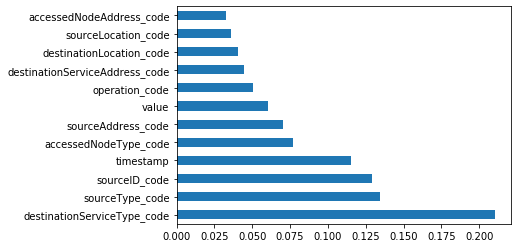

In [7]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model_extra = ExtraTreesClassifier()
model_extra.fit(ind_col,target)
print(model_extra.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_extra.feature_importances_, index=ind_col.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

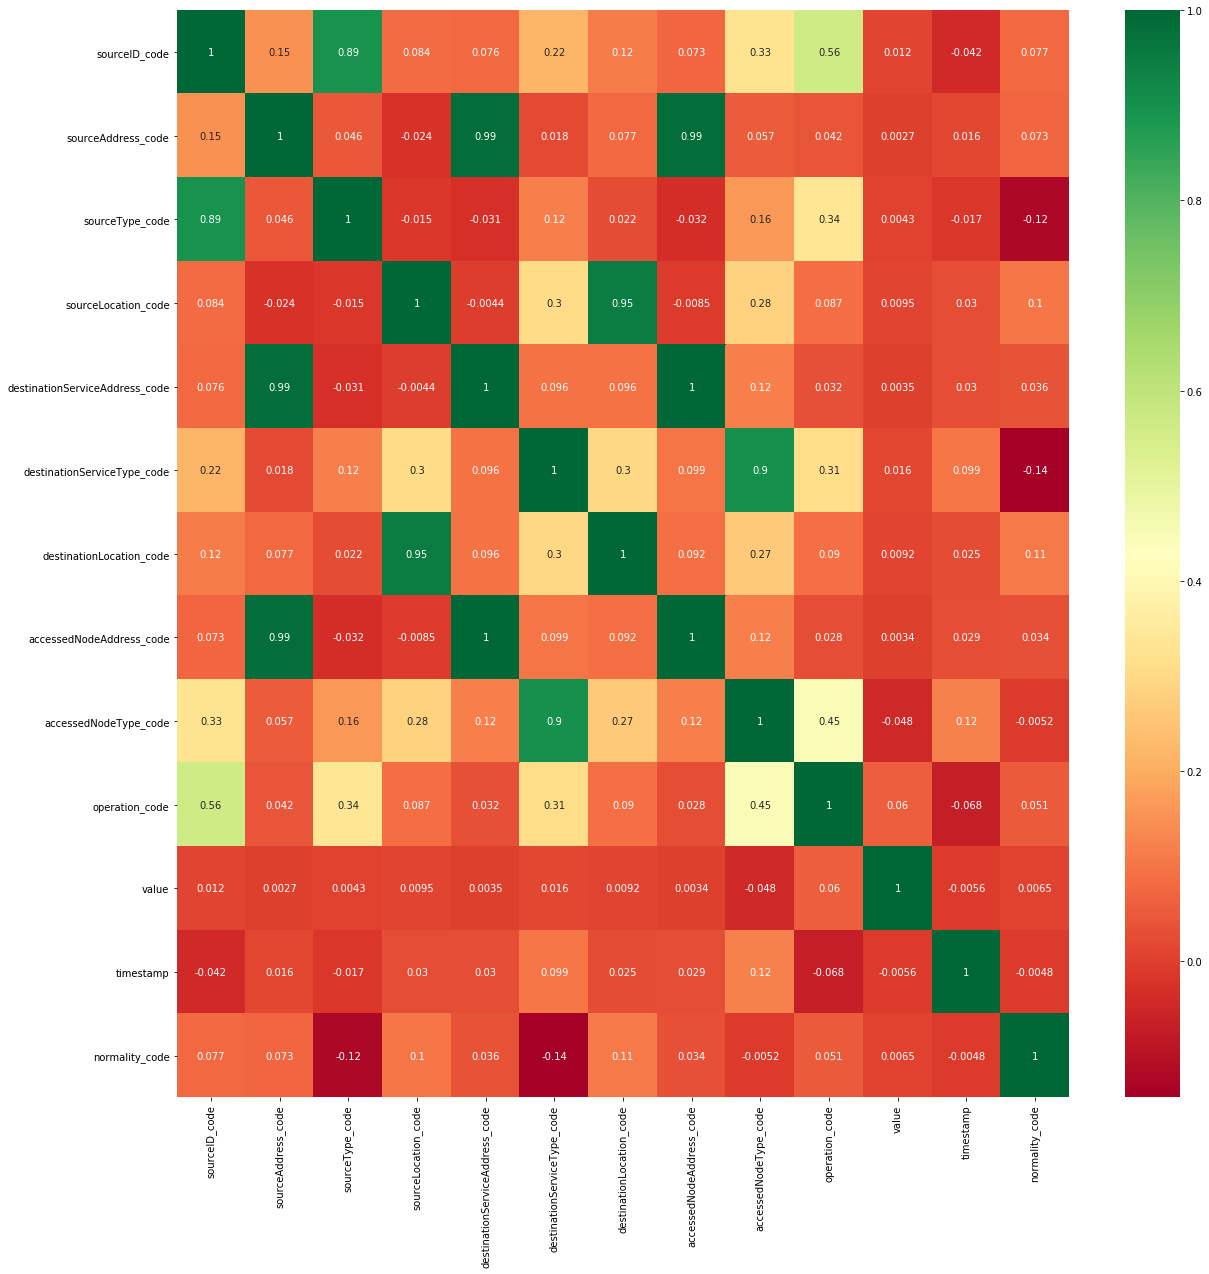

In [10]:
# Correlation Matrix with Heatmap

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# can combine 
# sourceAddress - destinationServiceAddress - accessedNodeAddress
# sourceLocation - destinationLocation

In [11]:
import os
from os import path 

if not path.exists('pictures'):
    os.mkdir('pictures')
plt.savefig(os.path.join('pictures', 'correlation_matrix'))

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :12], data.iloc[:, 12], test_size=0.3)

print(f'X_train: {X_train.shape} \n X_test: {X_test.shape} \n y_train: {y_train.shape} \n y_test: {y_test.shape}')

# split data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

In [ ]:
# import pickle

# with open('knn_model pickle', 'wb') as file:
#     pickle.dump(knn, file)

In [ ]:
# Predict the response for test dataset

y_pred = knn.predict(X_test)

In [ ]:
temp_pred = knn.predict([[13, 18, 6, 5, 29, 7, 9, 58, 2, 1, 0, 1520085612035]])

temp_pred

#ddos

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred) * 100, '%')